In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import os
import glob
import re

import sys
sys.path.append("./src/") 

import mnist_data
import plot_utils
import gzip
import importlib

import vae as ve
import matplotlib.pyplot as plt



### Read File 
- SPY data

In [2]:
importlib.reload(ve)

filelists = ['SPY']
mergeddata = ve.readData(filelists)

np_train = mergeddata[0][0]
np_test = mergeddata[0][1]
df_train = mergeddata[0][2]
df_test = mergeddata[0][3]
print(np_train.shape,np_test.shape,df_train.shape,df_test.shape)

(2136, 4083) (916, 4083) (2136, 29) (916, 29)


In [3]:
importlib.reload(ve)

filelists = ['SPY']
dfstocks = ve.readStock(filelists)
dfstock = dfstocks[0]
dfstock.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2007-01-03,141.37,142.25,142.86,140.57,94850000.0,-0.0018
2007-01-04,141.67,141.23,142.05,140.61,69640000.0,0.0021
2007-01-05,140.54,141.33,141.40,140.38,76700000.0,-0.0080
2007-01-08,141.19,140.82,141.41,140.25,71680000.0,0.0046
2007-01-09,141.07,141.31,141.60,140.40,75730000.0,-0.0008


### decoding the np_train data to generate the time dataframe

In [ ]:
%matplotlib notebook

importlib.reload(ve)

np_data = np_train
max_seq_len = 120
df_stock = dfstock
df_data = df_train
decoded_prices = ve.decode_npdata(np_data,max_seq_len,df_stock,df_data)

df_train['Close_Decode'] = np.array(decoded_prices['Close'])
df_train['Open_Decode'] = np.array(decoded_prices['Open'])
df_train['High_Decode'] = np.array(decoded_prices['High'])
df_train['Low_Decode'] = np.array(decoded_prices['Low'])
df_train['CurOpen_Decode'] = np.array(decoded_prices['CurOpen'])

df_train[['Close_Decode','Close']].plot()
# df_train[['Open_Decode','Open']].plot()
# df_train[['High_Decode','High']].plot()
plt.savefig("./pictures/gen_stock.png")

### decode stock data from variational autoencoder

In [ ]:
%matplotlib notebook 

importlib.reload(ve)

tf.reset_default_graph() 

with tf.Session() as sess:
    learning_rate= 0.0005
    dense_layers = [1500,700,300]
    dense_funcs = ['elu','elu','tanh']
    dim_z = 2#20 # latent vector size
    dim_out = np_train.shape[1]
    
    
    autoencoder = ve.vae(sess,learning_rate,dense_layers,dense_funcs,dim_z,dim_out)
    autoencoder.load()
    
    sess.run(tf.global_variables_initializer(), feed_dict={autoencoder.keep_prob : 0.9})
    
    x_PRR = np_train
    y_PRR = sess.run(autoencoder.y, feed_dict={autoencoder.x_hat: x_PRR, autoencoder.keep_prob : 1})
    
    np_data = y_PRR
    max_seq_len = 120
    df_stock = dfstock
    df_data = df_train

    ve.decode_display(np_data,max_seq_len,df_stock,df_data)

- generates the several random distribution results from the same input data

encoder_dense_layers [1500, 700, 300, 2]
gaussian encoder mean:(?, 2) 
mu:(?, 2) sigma:(?, 2)
encoder output z:(?, 2)
decoder_dense_layers [300, 700, 1500, 4083]
decoder output y:(?, 4083)
INFO:tensorflow:Restoring parameters from ./model/vae.model-1
 [*] Success to read vae.model-1


<IPython.core.display.Javascript object>


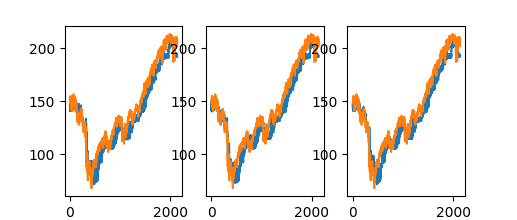

[143.6628442  142.32619253 140.93355508 147.56315237 142.85083658
 143.82597065 142.85619138 143.27376639 141.64709994 140.8583056 ]
[141.51432892 144.13858371 149.77729576 143.29322527 142.41918943
 149.00520128 149.47993592 143.64298397 140.47892578 142.33783262]
[145.92495516 143.94720916 142.96278268 148.39923188 143.53240664
 145.9696076  141.72230375 142.59728755 140.97483501 143.82251726]


In [12]:
%matplotlib notebook 

importlib.reload(ve)

encoder_input = np_train
df_data = df_train 

ve.decoded_images(encoder_input,df_data,dfstock)

### generating data from latent space
- pick up last stock data and get mean,std of that last point 
- and generate the stock data from near values of the mean,std

- display mapping image

encoder_dense_layers [1500, 700, 300, 2]
gaussian encoder mean:(?, 2) 
mu:(?, 2) sigma:(?, 2)
encoder output z:(?, 2)
decoder_dense_layers [300, 700, 1500, 4083]
decoder output y:(?, 4083)
INFO:tensorflow:Restoring parameters from ./model/vae.model-1
 [*] Success to read vae.model-1


<IPython.core.display.Javascript object>


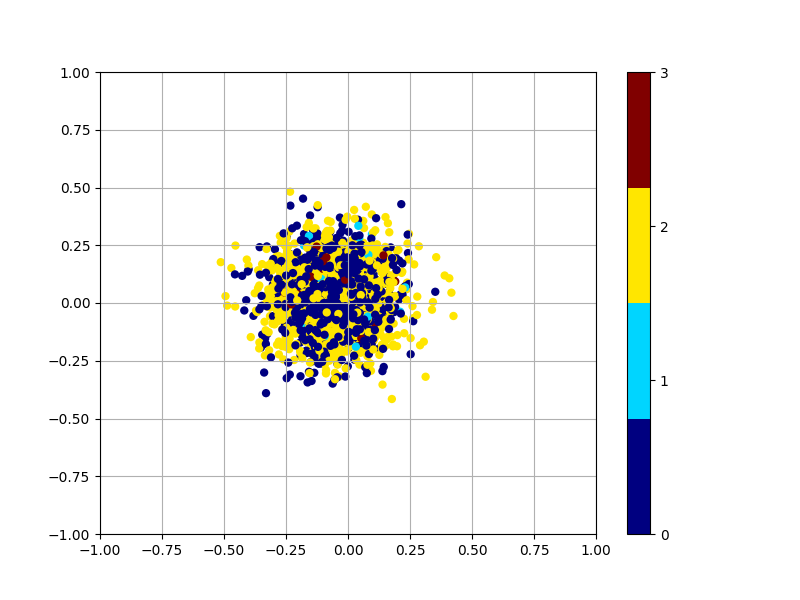

In [13]:
%matplotlib notebook 

importlib.reload(ve)

learning_rate= 0.0005
dense_layers = [1500,700,300]
dense_funcs = ['elu','elu','tanh']
dim_z = 2#20 # latent vector size
dim_out = np_train.shape[1]
nb_classes = 4
encoder_input = np_train
df_data = df_train 
z_range = 1
z_latent_data,one_hot_targets = ve.display_latent_data(learning_rate,dense_layers,dense_funcs,dim_z,dim_out,encoder_input,df_data,nb_classes,z_range)


- pick up one test point in encoder input

encoder_dense_layers [1500, 700, 300, 2]
gaussian encoder mean:(?, 2) 
mu:(?, 2) sigma:(?, 2)
encoder output z:(?, 2)
decoder_dense_layers [300, 700, 1500, 4083]
decoder output y:(?, 4083)
INFO:tensorflow:Restoring parameters from ./model/vae.model-1
 [*] Success to read vae.model-1
[-0.0461714  -0.19653706 -0.05568045 -0.09878861 -0.19945543 -0.10856522
 -0.1743166  -0.13337946 -0.17109317 -0.21404195] [-0.05240532  0.05148015  0.06386425  0.03872865  0.21503949  0.2196256
  0.0073319  -0.13987632  0.11825322  0.05182514]


<IPython.core.display.Javascript object>


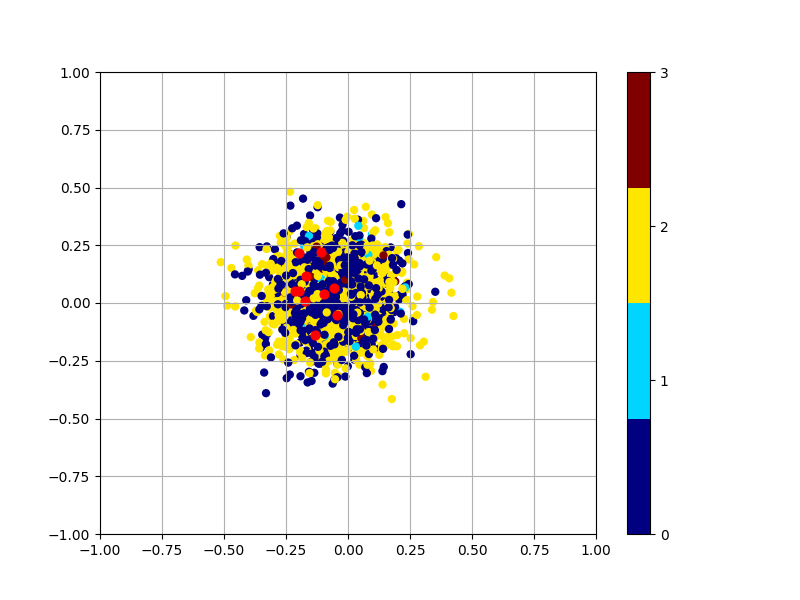

In [20]:
%matplotlib notebook 

importlib.reload(ve)

learning_rate= 0.0005
dense_layers = [1500,700,300]
dense_funcs = ['elu','elu','tanh']
dim_z = 2#20 # latent vector size
dim_out = np_train.shape[1]

encoder_input = np_train[0:10]
# encoder_input = np.expand_dims(encoder_input,axis=0)
# print("encoder_input {}".format(encoder_input))
z_data = ve.generate_latent_data(learning_rate,dense_layers,dense_funcs,dim_z,dim_out,encoder_input)
print(z_data[:,0],z_data[:,1])
nb_classes = 4
z_range = 1
ve.save_scattered_image(z_latent_data,one_hot_targets,nb_classes,z_range, name="")
plt.scatter(z_data[:,0],z_data[:,1],marker='o',c='red',s=40)

- generates data from sample latent array

<IPython.core.display.Javascript object>


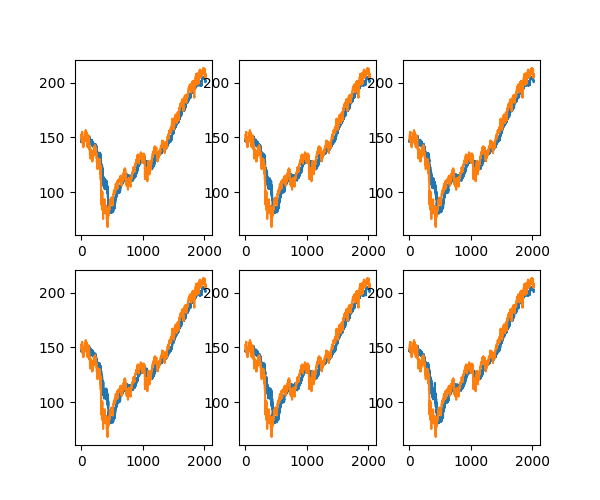

encoder_dense_layers [1500, 700, 300, 2]
gaussian encoder mean:(?, 2) 
mu:(?, 2) sigma:(?, 2)
encoder output z:(?, 2)
decoder_dense_layers [300, 700, 1500, 4083]
decoder output y:(?, 4083)
INFO:tensorflow:Restoring parameters from ./model/vae.model-1
 [*] Success to read vae.model-1
sample_z [[ -7.2090012  -59.41026086]
 [-55.27287395 -93.7240902 ]
 [  3.53238003   2.27529052]
 [-12.57176726 -22.55685216]
 [ -2.32251025 -33.99889188]
 [-44.94363309 -45.40060702]
 [-66.33645672 -51.94426903]
 [-19.33026082 -37.57468084]
 [-71.90924159 -69.95418105]
 [-46.78237004 -34.95009543]]
gen_y [[0.44725406 0.4839458  0.399167   ... 0.41349697 0.44872952 0.3686734 ]
 [0.5300742  0.5328641  0.49726826 ... 0.4552263  0.42873612 0.39293003]
 [0.3361796  0.39290068 0.32407248 ... 0.2905999  0.33626825 0.36158636]
 ...
 [0.49078903 0.5098886  0.45227122 ... 0.43654978 0.4402941  0.40437144]
 [0.5824539  0.5895265  0.5808814  ... 0.50357467 0.46968523 0.41346514]
 [0.56983984 0.63773566 0.54818916 ... 0

/home/home9second/.virtualenvs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[146.69336662 145.97439782 149.20913193 146.51093005 147.29715656
 145.85028948 145.82522221 146.63809043 145.59434334 145.92584671]
encoder_dense_layers [1500, 700, 300, 2]
gaussian encoder mean:(?, 2) 
mu:(?, 2) sigma:(?, 2)
encoder output z:(?, 2)
decoder_dense_layers [300, 700, 1500, 4083]
decoder output y:(?, 4083)
INFO:tensorflow:Restoring parameters from ./model/vae.model-1
 [*] Success to read vae.model-1
sample_z [[-86.28058525 -14.06102995]
 [ -9.40073969 -25.89852053]
 [-72.4645859  -37.08393522]
 [  0.86740136 -67.48113168]
 [ -5.68134803 -25.08543804]
 [-96.49389024 -40.73314998]
 [-63.71984351  -5.73012062]
 [-80.7348116    3.49640628]
 [-12.33514193 -88.97717153]
 [-83.52647505 -54.83378784]]
gen_y [[0.59161514 0.60659474 0.5465286  ... 0.37685305 0.32724154 0.35548192]
 [0.44748923 0.4810756  0.42989388 ... 0.41596517 0.44395816 0.3655639 ]
 [0.58663225 0.64160323 0.5804721  ... 0.4401302  0.3975101  0.37741852]
 ...
 [0.563328   0.5719049  0.50878197 ... 0.38354838 0.3

In [50]:
%matplotlib notebook
importlib.reload(ve)
learning_rate= 0.0005
dense_layers = [1500,700,300]
dense_funcs = ['elu','elu','tanh']
dim_z = 2#20 # latent vector size
dim_out = np_train.shape[1]

fig,axes = plt.subplots(2,3,figsize=(6,5))
for i, ax in enumerate(axes.flat):
    gen_y = ve.generate_stock_data(learning_rate,dense_layers,dense_funcs,dim_z,dim_out)

    datalimit = gen_y.shape[0]
    np_data = gen_y
    max_seq_len = 120
    df_stock = dfstock[:datalimit]
    df_data = df_train[:datalimit]
#     gen_y.shape,df_stock.shape,df_data.shape
    decoded_prices = ve.decode_npdata(np_data,max_seq_len,df_stock,df_data)
    df_data['Close_Decode'] = np.array(decoded_prices['Close'])
    ax.plot(df_data['Close_Decode'].values)
    ax.plot(df_data['Close'].values)
    print(df_data['Close_Decode'].values[:10])
#     ve.decode_display(np_data,max_seq_len,df_stock,df_data)
    
    

In [37]:
z_range = 0.5
n_x = 45
n_y = 45
z = np.rollaxis(np.mgrid[z_range:-z_range:n_y * 1j, z_range:-z_range:n_x * 1j], 0, 3)
sample_z = z.reshape([-1, 2])
sample_z.shape
sample_z = sample_z + np.random.normal(0, 1,sample_z.shape)
sample_z[:10]

array([[ 0.89254699,  1.52328756],
       [-0.7340567 , -0.75337514],
       [ 1.00395681,  1.11605632],
       [-1.26527403,  0.4140069 ],
       [ 1.60531704, -0.10524713],
       [-1.5962209 ,  1.45290128],
       [ 0.03739325, -0.1636963 ],
       [ 0.27303671, -0.57586366],
       [ 1.21303194,  1.3835698 ],
       [ 0.52807734,  0.09742003]])

### Training Variational Autoencoder

In [5]:
importlib.reload(ve)

with tf.Session() as sess:
        
    learning_rate= 0.0005
    dense_layers = [1500,700,300]
    dense_funcs = ['elu','elu','tanh']
    dim_z = 2#20 # latent vector size
    dim_out = np_train.shape[1]
    
    
    autoencoder = ve.vae(sess,learning_rate,dense_layers,dense_funcs,dim_z,dim_out)
    sess.run(tf.global_variables_initializer(), feed_dict={autoencoder.keep_prob : 0.9})
    
    # train
    n_epochs = 200
    batch_size = 40
    n_samples = np_train.shape[0]
    total_batch = int(n_samples / batch_size)
    ADD_NOISE = True
    train_total_data = np_train
    
    for epoch in range(n_epochs):

        # Random shuffling
        np.random.shuffle(train_total_data)
        train_data_ = train_total_data

        # Loop over all batches
        for i in range(total_batch):
            # Compute the offset of the current minibatch in the data.
            offset = (i * batch_size) % (n_samples)
            batch_xs_input = train_data_[offset:(offset + batch_size), :]

            batch_xs_target = batch_xs_input
            
            
            # add salt & pepper noise
            if ADD_NOISE:
                batch_xs_input = batch_xs_input * np.random.randint(2, size=batch_xs_input.shape)
                batch_xs_input += np.random.randint(2, size=batch_xs_input.shape)
            
            _, tot_loss, loss_likelihood, loss_divergence = sess.run(
                (autoencoder.train_op, autoencoder.loss, autoencoder.neg_marginal_likelihood, autoencoder.KL_divergence),
                feed_dict={autoencoder.x_hat: batch_xs_input, autoencoder.x: batch_xs_target, autoencoder.keep_prob : 0.9})
            
            
#         print("epoch {}".format(epoch))
        # print cost every epoch
        print("epoch %d: L_tot %03.2f L_likelihood %03.2f L_divergence %03.2f" % (epoch, tot_loss, loss_likelihood, loss_divergence))

        
    autoencoder.save(1)

encoder_dense_layers [1500, 700, 300, 2]
gaussian encoder mean:(?, 2) 
mu:(?, 2) sigma:(?, 2)
encoder output z:(?, 2)
decoder_dense_layers [300, 700, 1500, 4083]
decoder output y:(?, 4083)
epoch 0: L_tot 2821.96 L_likelihood 2814.93 L_divergence 7.03
epoch 1: L_tot 2818.81 L_likelihood 2814.12 L_divergence 4.69
epoch 2: L_tot 2804.40 L_likelihood 2800.20 L_divergence 4.20
epoch 3: L_tot 2749.89 L_likelihood 2745.65 L_divergence 4.24
epoch 4: L_tot 2754.00 L_likelihood 2749.67 L_divergence 4.34
epoch 5: L_tot 2766.73 L_likelihood 2762.52 L_divergence 4.21
epoch 6: L_tot 2772.87 L_likelihood 2769.46 L_divergence 3.41
epoch 7: L_tot 2755.04 L_likelihood 2751.57 L_divergence 3.47
epoch 8: L_tot 2761.81 L_likelihood 2758.00 L_divergence 3.81
epoch 9: L_tot 2766.20 L_likelihood 2762.71 L_divergence 3.49
epoch 10: L_tot 2753.32 L_likelihood 2750.03 L_divergence 3.30
epoch 11: L_tot 2767.99 L_likelihood 2764.91 L_divergence 3.08
epoch 12: L_tot 2753.81 L_likelihood 2750.37 L_divergence 3.43
ep

epoch 127: L_tot 2758.30 L_likelihood 2754.94 L_divergence 3.36
epoch 128: L_tot 2756.59 L_likelihood 2753.96 L_divergence 2.63
epoch 129: L_tot 2726.18 L_likelihood 2723.41 L_divergence 2.77
epoch 130: L_tot 2745.55 L_likelihood 2742.54 L_divergence 3.00
epoch 131: L_tot 2739.99 L_likelihood 2737.43 L_divergence 2.56
epoch 132: L_tot 2759.05 L_likelihood 2756.05 L_divergence 3.00
epoch 133: L_tot 2749.31 L_likelihood 2746.77 L_divergence 2.54
epoch 134: L_tot 2742.45 L_likelihood 2739.25 L_divergence 3.20
epoch 135: L_tot 2744.72 L_likelihood 2741.29 L_divergence 3.43
epoch 136: L_tot 2744.11 L_likelihood 2741.07 L_divergence 3.04
epoch 137: L_tot 2748.61 L_likelihood 2745.82 L_divergence 2.79
epoch 138: L_tot 2747.24 L_likelihood 2744.62 L_divergence 2.62
epoch 139: L_tot 2749.41 L_likelihood 2746.50 L_divergence 2.91
epoch 140: L_tot 2762.47 L_likelihood 2759.25 L_divergence 3.22
epoch 141: L_tot 2740.88 L_likelihood 2738.44 L_divergence 2.44
epoch 142: L_tot 2750.69 L_likelihood 27